In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import tensorflow_datasets as tfds

print(tf.__version__)

2.0.0-rc0


In [3]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True, shuffle_files=True)
train_data, test_data = dataset['train'], dataset['test']

In [8]:
tokenizer = info.features['text'].encoder

In [13]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_data = train_data.shuffle(BUFFER_SIZE)
train_data = train_data.padded_batch(BATCH_SIZE, train_data.output_shapes)
test_data = test_data.padded_batch(BATCH_SIZE, test_data.output_shapes)

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
NUM_EPOCHS = 10
history = model.fit(train_data, epochs=NUM_EPOCHS, validation_data=test_data)

Epoch 1/10


W0904 16:13:41.838235 140068509546304 deprecation.py:323] From /opt/tljh/user/lib/python3.6/site-packages/tensorflow_core/python/ops/nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


391/391 [==============================] - 796s 2s/step - loss: 0.5039 - accuracy: 0.7485 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
391/391 [==============================] - 791s 2s/step - loss: 0.4831 - accuracy: 0.7763 - val_loss: 0.6092 - val_accuracy: 0.6361
Epoch 3/10
391/391 [==============================] - 785s 2s/step - loss: 0.4459 - accuracy: 0.8010 - val_loss: 0.4939 - val_accuracy: 0.7680
Epoch 4/10
391/391 [==============================] - 786s 2s/step - loss: 0.4741 - accuracy: 0.7696 - val_loss: 0.3851 - val_accuracy: 0.8421
Epoch 5/10
391/391 [==============================] - 798s 2s/step - loss: 0.2672 - accuracy: 0.8952 - val_loss: 0.3975 - val_accuracy: 0.8289
Epoch 6/10
391/391 [==============================] - 804s 2s/step - loss: 0.2410 - accuracy: 0.9050 - val_loss: 0.3484 - val_accuracy: 0.8583
Epoch 7/10
391/391 [==============================] - 805s 2s/step - loss: 0.1923 - accuracy: 0.9285 - val_loss: 0.3324 - val_accuracy: 0.8630
Ep

In [19]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

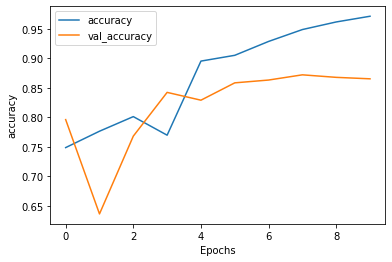

In [20]:
plot_graphs(history, 'accuracy');

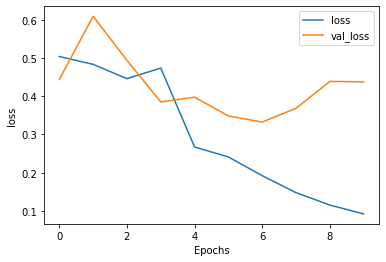

In [21]:
plot_graphs(history, 'loss')